In [13]:
import pandas as pd


dff2017=pd.read_csv('despesas-guarulhos-2017.zip.csv', sep=';', encoding='latin-1', decimal='.')
dff2018=pd.read_csv('despesas-guarulhos-2018.csv', sep=';', encoding='latin-1', decimal='.')
dff2019=pd.read_csv('despesas-guarulhos-2019.csv', sep=';', encoding='latin-1', decimal='.')
dff2020=pd.read_csv('despesas-guarulhos-2020.csv', sep=';', encoding='latin-1', decimal='.')
dff2021=pd.read_csv('despesas-grucity-2021.csv', sep=';', encoding='latin-1', decimal='.')

In [14]:
df_2017=dff2017.filter(['ano_exercicio', 'ds_municipio', 'ds_orgao', 'mes_ref_extenso', 'vl_despesa', 'ds_funcao_governo'])
df_2018=dff2018.filter(['ano_exercicio', 'ds_municipio', 'ds_orgao', 'mes_ref_extenso', 'vl_despesa', 'ds_funcao_governo'])
df_2019=dff2019.filter(['ano_exercicio', 'ds_municipio', 'ds_orgao', 'mes_ref_extenso', 'vl_despesa', 'ds_funcao_governo'])
df_2020=dff2020.filter(['ano_exercicio', 'ds_municipio', 'ds_orgao', 'mes_ref_extenso', 'vl_despesa', 'ds_funcao_governo'])
df_2021=dff2021.filter(['ano_exercicio', 'ds_municipio', 'ds_orgao', 'mes_ref_extenso', 'vl_despesa', 'ds_funcao_governo'])

In [15]:
df2017=df_2017.rename(columns={'ano_exercicio':'Ano', 'ds_municipio':'Município', 'ds_orgao':'Órgão','mes_ref_extenso':'Mês','vl_despesa':'Valor despesa', 'ds_funcao_governo':'Função governo'})
df2018=df_2018.rename(columns={'ano_exercicio':'Ano', 'ds_municipio':'Município', 'ds_orgao':'Órgão','mes_ref_extenso':'Mês','vl_despesa':'Valor despesa', 'ds_funcao_governo':'Função governo'})
df2019=df_2019.rename(columns={'ano_exercicio':'Ano', 'ds_municipio':'Município', 'ds_orgao':'Órgão','mes_ref_extenso':'Mês','vl_despesa':'Valor despesa', 'ds_funcao_governo':'Função governo'})
df2020=df_2020.rename(columns={'ano_exercicio':'Ano', 'ds_municipio':'Município', 'ds_orgao':'Órgão','mes_ref_extenso':'Mês','vl_despesa':'Valor despesa', 'ds_funcao_governo':'Função governo'})
df2021=df_2021.rename(columns={'ano_exercicio':'Ano', 'ds_municipio':'Município', 'ds_orgao':'Órgão','mes_ref_extenso':'Mês','vl_despesa':'Valor despesa', 'ds_funcao_governo':'Função governo'})

In [28]:
def to_float(df):
    df = df['Valor despesa'].str.replace(',','.').astype(float)
    return df

In [29]:
saude17=df2017.loc[df2017['Função governo']=='SAÚDE']
saude18=df2018.loc[df2018['Função governo']=='SAÚDE']
saude19=df2019.loc[df2019['Função governo']=='SAÚDE']
saude20=df2020.loc[df2020['Função governo']=='SAÚDE']
saude21=df2021.loc[df2021['Função governo']=='SAÚDE']

In [30]:
to_float(saude17)
to_float(saude18)
to_float(saude19)
to_float(saude20)
to_float(saude21)

5         44700.0
6          2066.0
7        502107.0
8         30208.0
9         15300.0
           ...   
62232      2639.0
62233     12501.0
62235      1403.0
62236       450.0
62239     11500.0
Name: Valor despesa, Length: 14150, dtype: float64

In [27]:
a = 531700014+240570894+322680959+336084334+276519415+276537585+308084340+253177368+232580887+211984406+191387925+170791444+150194963

ano=['2017','2018', '2019', '2020', '2021']
valores=[saude17['Valor despesa'].sum()*1.2197, saude18['Valor despesa'].sum()*1.1848, saude19['Valor despesa'].sum()*1.1420, saude20['Valor despesa'].sum()*1.0949, int(a)]


geralgru=pd.DataFrame({
    'Ano': ano,
    'Valor': valores
})

geralgru

TypeError: can't multiply sequence by non-int of type 'float'

GUARULHOS
---

In [ ]:
import plotly.express as px

fig=px.line(geralgru, x='Ano', y='Valor' ,color_discrete_sequence=['red'])
fig.update_layout(title='SOMA DOS INVESTIMENTOS',
                 yaxis_range=[3000000000, 5100000000])
fig.show()

print("Decréscimo de 6.5% de 2020 para 2021")

SÃO PAULO
--

In [ ]:
a = 14490706700

ano=['2017', '2018', '2019', '2020', '2021']
valores=[10349259865*1.2197, 10256815745*1.1848, 11220159176*1.1420, 13713861845*1.0949, int(a)]

geralsp=pd.DataFrame({
    'Ano': ano,
    'Soma': valores
})

geralsp 

In [ ]:
fig=px.line(geralsp, x='Ano', y='Soma' ,color_discrete_sequence=['red'])
fig.update_layout(title='SOMA DOS INVESTIMENTOS',
                 #yaxis_range=[3000000000, 4100000000]) 
                 )
fig.show()

print('Diminuição de aproximadamente 6% de 2020 para 2021')

In [ ]:
saude21

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

#função para pegar a soma de todos os meses
def get_soma(mes):
    loc_meses = saude21.loc[saude21['Mês']==mes]
    soma_meses = loc_meses['Valor despesa'].sum()
    return soma_meses

meses = [1, 2, 3, 4, 5, 6, 7]
valores = [get_soma('Janeiro'), get_soma('Fevereiro'), get_soma('Março'), get_soma('Abril'), get_soma('Maio'), get_soma('Junho'), get_soma('Julho')]

#DF soma de todos os meses p/ fazer regressão linear
df_reg = pd.DataFrame({
    'Mês': meses,
    'Valor': valores
})    
#df_reg


##X = df_reg['Mês'].values
#Y = df_reg['Valor'].values


#correlacao = np.corrcoef(X, Y)

#regressor = LinearRegression()
#regressor.fit(X, Y)

#X = X.reshape(1,-1)
#Y = Y.reshape(-1,1)

#regressor.coef_
#regressor.intercept_


#REGRESSÃO LINEAR    
#plt.scatter(X, Y)
#plt.plot(Y, regressor.predict(Y), color='red')

ÁREAS QUE MAIS E MENOS INVESTEM
--

GUARULHOS - 2019
--

In [ ]:
df2019

In [ ]:
def get_setor(setor):
    df=df2019.loc[df2019['Função governo']==setor]
    df=df['Valor despesa'].sum()
    return df

In [ ]:
#pegando os DFs de todos os setores 

trans=get_setor('TRANSPORTE')
educ=get_setor('EDUCAÇÃO')
social=get_setor('ASSISTÊNCIA SOCIAL')
adm=get_setor('ADMINISTRAÇÃO')
ct=get_setor('CIÊNCIA E TECNOLOGIA')
cult=get_setor('CULTURA')
ga=get_setor('GESTÃO AMBIENTAL')
saúde=get_setor('SAÚDE')
trab=get_setor('TRABALHO')
dl=get_setor('DESPORTO E LAZER')
cs=get_setor('COMÉRCIO E SERVIÇOS')
seg=get_setor('SEGURANÇA PÚBLICA')
ee=get_setor('ENCARGOS ESPECIAIS')

In [ ]:
setores = ['TRANSPORTE', 'EDUCAÇÃO', 'ASSISTÊNCIA SOCIAL', 'ADMINISTRAÇÃO', 'CIÊNCIA E TECNOLOGIA', 'CULTURA', 'GESTÃO AMBIENTAÇ', 'SAÚDE', 'TRABALHO', 'DESPORTO E LAZER', 'COMÉRCIO E SERVIÇOS', 'SEGURANÇA PÚBLICA', 'ENCARGOS ESPECIAIS']
valores = [trans, educ, social, adm, ct, cult, ga, saúde, trab, dl, cs, seg, ee]

In [ ]:
dfgeral19=pd.DataFrame({
    'Setor': setores,
    'Soma': valores
})

dfgeral19

In [ ]:
import plotly.express as px

fig=px.bar(dfgeral19, x='Setor', y='Soma', color_discrete_sequence=['darkcyan'])
fig.update_layout(title='INVESTIMENTOS 2019 - GUARULHOS')
fig.show()


print(' 3 MELHORES: Saúde, Educação e Administração', '\n', '3 PIORES: Ciência e tecnologia, Cultura e Comércio e serviços')

GUARULHOS - 2020
--

In [ ]:
df2020

In [ ]:
def get_setor(setor):
    df=df2020.loc[df2020['Função governo']==setor]
    df=df['Valor despesa'].sum()
    return df

In [ ]:
trans=get_setor('TRANSPORTE')
educ=get_setor('EDUCAÇÃO')
social=get_setor('ASSISTÊNCIA SOCIAL')
adm=get_setor('ADMINISTRAÇÃO')
ct=get_setor('CIÊNCIA E TECNOLOGIA')
cult=get_setor('CULTURA')
ga=get_setor('GESTÃO AMBIENTAL')
saúde=get_setor('SAÚDE')
trab=get_setor('TRABALHO')
dl=get_setor('DESPORTO E LAZER')
cs=get_setor('COMÉRCIO E SERVIÇOS')
seg=get_setor('SEGURANÇA PÚBLICA')
ee=get_setor('ENCARGOS ESPECIAIS')

In [ ]:
setores = ['TRANSPORTE', 'EDUCAÇÃO', 'ASSISTÊNCIA SOCIAL', 'ADMINISTRAÇÃO', 'CIÊNCIA E TECNOLOGIA', 'CULTURA', 'GESTÃO AMBIENTAÇ', 'SAÚDE', 'TRABALHO', 'DESPORTO E LAZER', 'COMÉRCIO E SERVIÇOS', 'SEGURANÇA PÚBLICA', 'ENCARGOS ESPECIAIS']
valores = [trans, educ, social, adm, ct, cult, ga, saúde, trab, dl, cs, seg, ee]

In [ ]:
dfgeral20=pd.DataFrame({
    'Setor': setores,
    'Soma': valores
})

dfgeral20

In [ ]:
import plotly.express as px

fig=px.bar(dfgeral20, x='Setor', y='Soma', color_discrete_sequence=['darkcyan'])
fig.update_layout(title='INVESTIMENTOS 2020 - GUARULHOS')
fig.show()


print(' 3 MELHORES: Saúde, Educação e Administração', '\n', '3 PIORES: Ciência e tecnologia, Trabalho e Comércio e serviços')

Informações para fazer o gráfico de SP no site: http://transparencia.prefeitura.sp.gov.br/orcamento/despesas/
--

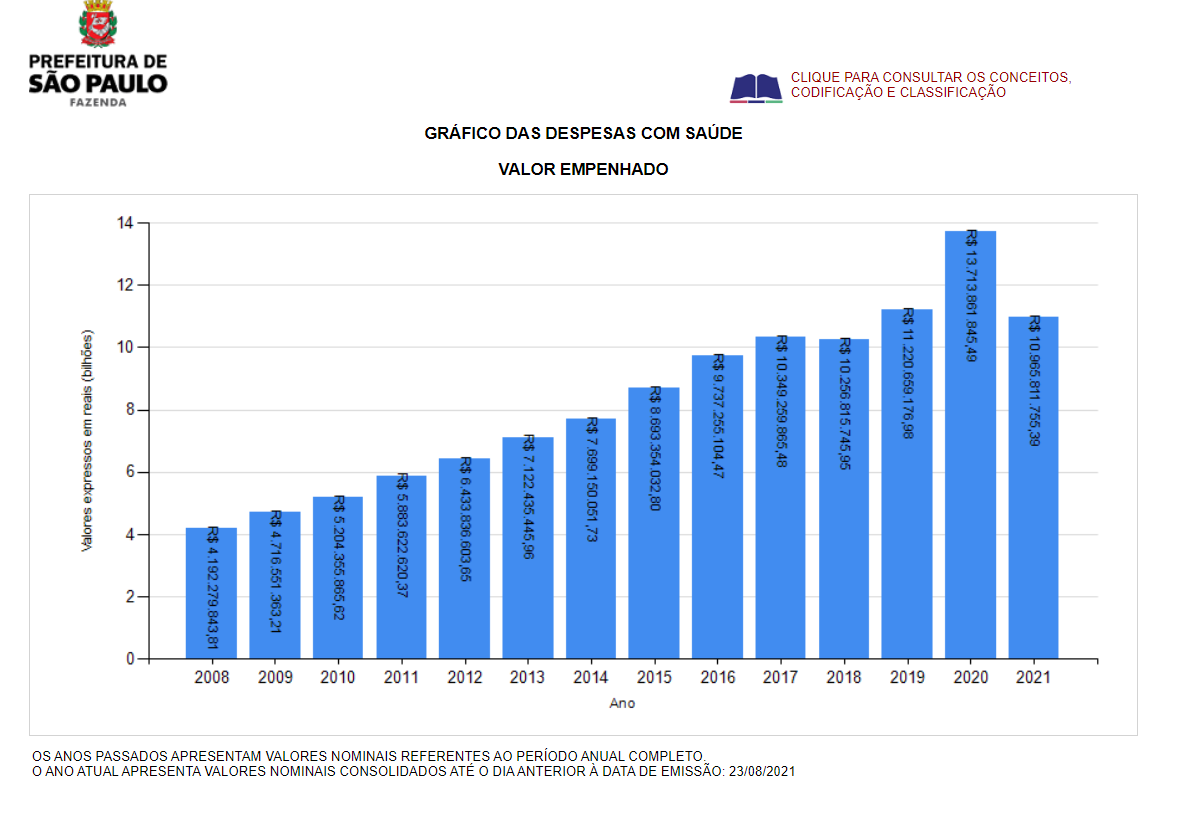

In [ ]:
mun = ['Guarulhos', 'São Paulo', 'São Bernardo', 'Campinas', 'São José', 'Santo André', 'Mauá', 'Sorocaba', 'Ribeirão Preto', 'Osasco']
porc1920 = [7, 17.1, 33.7, 8.1, 6.5, 24.4, 11.8, 10.3, 10, 12]
porc2021 = [-14.6, -3.3, -0.9, 12.1 , -16.3, 26, -1.1, -10.5, 1, 5]

In [ ]:
#porcentagens de crescimento de investimentos na saude (2019-2020)

df_porc= pd.DataFrame({
    'Municípios': mun,
    'Crescimento 2019-2020 (%)': porc1920,
    'Crescimento 2020-2021 (%)': porc2021
})

df_porc

GRÁFICO BASE
==

In [ ]:
fig=px.bar(df_porc, x='Municípios',y=['Crescimento 2019-2020 (%)','Crescimento 2020-2021 (%)'], 
           barmode='group')
          
          

fig.update_layout(title='CRESCIMENTO/DESCRESCIMENTO DE GASTOS NA SAÚDE',
                 yaxis_title='Crescimento/Decrescimento (%)')

#fig.update_xaxes(df_porc, dividerwidth=20)

fig.show()

BUSCAR O BOLETIM DE CADA MUNICÍPIO 
--


```
-- porcentagem de morte --
-- porcentagem de pessoas 100% vacinadas --
```



``
GUARULHOS
``

``
confirmaos: 78583 - óbitos: 4793 - morte (%): 6.1%
``

``
população: 1.392 milhão     porcentagem totalmente vacinada: 26,52%
``



``
SÃO PAULO
``

``
confirmados: 1410278 - óbitos: 36939 - morte (%): 2,6%
``

``
população: 12,33 milhões     porcentagem totalmente vacinada: 41,91%
``

In [ ]:
#fazer gráfico comparando a porcentagem de 100% vacinados nos municipios 

In [ ]:
mun = ['Guarulhos', 'São Paulo', 'São Bernardo', 'Campinas', 'São José', 'Santo André', 'Mauá', 'Sorocaba', 'Ribeirão Preto', 'Osasco']
let = [7.7, 3.9, 4.3, 4, 2.1, 4.6, 4.8, 3.7, 3.6, 5.7]



df_let=pd.DataFrame({
    'Município': mun, 
    'Letalidade (%)': let
})
df_let

In [ ]:
fig=px.bar(df_let, x='Município', y='Letalidade (%)', color_discrete_sequence=['deepskyblue'])
fig.update_layout(title='PORCENTAGEM DE LETALIDADE',
                 yaxis_range = [0, 10])
fig.show()

In [ ]:
mun = ['Guarulhos', 'São Paulo', 'São Bernardo', 'Campinas', 'São José', 'Santo André', 'Mauá', 'Sorocaba', 'Ribeirão Preto', 'Osasco']
vac_completa = [30.8, 41.9, 39.9, 41, 40.1, 36.3, 28.9, 27.4, 39, 33.8]

df_vac=pd.DataFrame({
    'Município': mun, 
    'Totalmente vacinados (%)': vac_completa
})
df_vac

In [ ]:
fig=px.bar(df_vac, x='Município', y='Totalmente vacinados (%)', color_discrete_sequence=['lightskyblue'])
fig.update_layout(title='PORCENTAGEM DA POPULAÇÃO TOTALMENTE VACINADA',
                 yaxis_range=[0, 100])
fig.show()

In [ ]:
####################################

ÍNDICE DE ISOLAMENTO SOCIAL MUNICIPAL
==


In [ ]:
iso_munnn=pd.read_csv('ind_iso_sp_estado.csv', sep=';', encoding='latin-1')
iso_munnn

In [ ]:
iso_mun=iso_munnn.sort_values(by=['Data'])
iso_mun